 # Tutoriais
 ## Atividade 04

 Plotar o gráfico de coeficiente de tração por fator de potencia induzida para seguintes condições:

 a) Duas pás sem correção de ponta de pá

 b) Duas pás com correção de ponta de pá

 c) Quatro pás com correção de ponta de pá

 Dados: $\sigma = 0.1$, $ C_{treq} $ variando de 0.002 a 0.009, $C_{l\alpha}$ = 5.9, $\theta_{tw}$ = 0

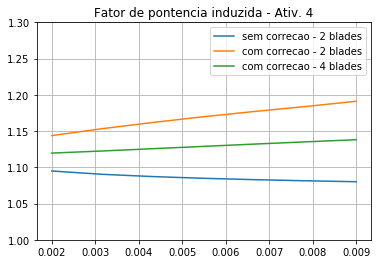

In [4]:
import aerobemt as bem
import numpy as np
import matplotlib.pyplot as plt

## definindo rotor
rotor1 = bem.Rotor(cla= 5.9, ctreq = np.linspace(0.002,0.009,num=7) , solidEqui=0.1, numberBlades=2, twist=0)

## montando a simulação
simulacao = bem.Bemt(rotor1, correcao=False)
__,__,__,__,k1,__,__ = simulacao.solver()

simulacao = bem.Bemt(rotor1, correcao=True)
__,__,__,__,k2,__,__ = simulacao.solver()

rotor1.numberBlades = 4
simulacao = bem.Bemt(rotor1, correcao=True)
__,__,__,__,k3,__,__ = simulacao.solver()

plt.title('Fator de pontencia induzida - Ativ. 4')
plt.plot(rotor1.ctreq[ k1 != 0 ], k1[k1 != 0], label = 'sem correcao - 2 blades')
plt.plot(rotor1.ctreq[ k2 != 0 ], k2[k2 != 0], label = 'com correcao - 2 blades')
plt.plot(rotor1.ctreq[ k3 != 0 ], k3[k3 != 0], label = 'com correcao - 4 blades')
plt.ylim([1,1.3])
plt.legend()
plt.grid()


 ## Atividade 05

 Plotar o gráfico de coeficiente sustentação pelo raio adimensional e velocidade induzida pelo raio adimensional.
 Com correção de Prandtl.

 Dados: $\sigma = 0.1$, $ C_{treq} $ = 0.008, $C_{l\alpha}$ = 5.9, $\theta_{tw}$ = \[0°, -5°, -10°, -15°, -20°, -25°] , $N_b$ = 4, $C_{D0}$ = 0.01,

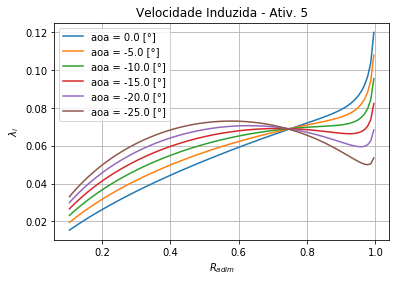

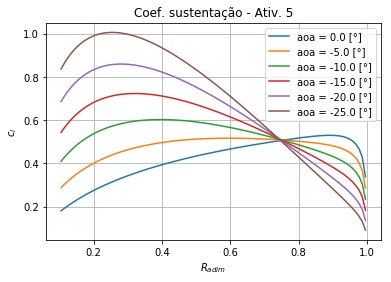

In [5]:
## definição das configurações do roto


twist = np.linspace(0, -25, num = 6)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in twist:

    rotor2 = bem.Rotor(cla= 5.9, ctreq=[0.008], solidEqui=0.1, numberBlades=4, twist=i)
    # setando o termo de arrato arasto constante
    rotor2.setArrato(cd0=0.01)

    ## montar a simulação
    simulacao2 = bem.Bemt(rotor2, correcao=True)
    dct_r, __, vel_induzida, cl, __, __, __ = simulacao2.solver()

    
    ax1.plot(simulacao2.r_adim, vel_induzida[0,:], label = f'aoa = {i} [°]')
    ax2.plot(simulacao2.r_adim, cl,  label = f'aoa = {i} [°]')
    
ax1.set_title('Velocidade Induzida - Ativ. 5')  
ax1.grid()
ax1.set_xlabel(r'$R_{adim}$')
ax1.set_ylabel(r'$\lambda_i$')
ax1.legend()

ax2.set_title('Coef. sustentação - Ativ. 5')  
ax2.grid()
ax2.set_xlabel(r'$R_{adim}$')
ax2.set_ylabel(r'$c_l$')
ax2.legend()


 ## Atividade 07

 Plotar o gráfico de coeficiente sustentação pelo raio adimensiona e gradiente do coeficiente de tração pelo raio adimensional.
 Com correção de Prandtl.

 Dados: $\sigma = 0.1$, $ C_{treq} $ = 0.008, $C_{l\alpha}$ = 5.9, $\theta_{tw}$ = -10° , $N_b$ = 2, $C_{D0}$ = 0.01, $D_1$ = 0.025, $D_2$ = 0.65, $\gamma$  = 1, 2, 3.

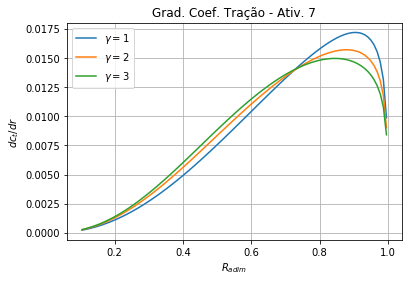

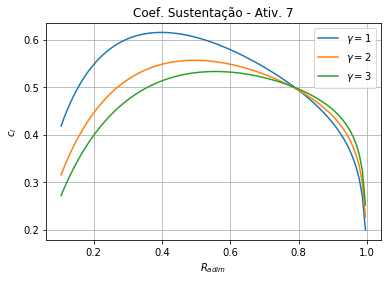

In [6]:

fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

## definição do rotor
rotor3 = bem.Rotor(cla= 5.9, ctreq=[0.008], solidEqui=0.1, numberBlades=2, twist=-10)
# setando o arrato parabolico
rotor3.setArrato(cd0=0.01, d1 = 0.025, d2 = 0.65)
# setando o afilamento
rotor3.setAfilamento(gamma = 1)

# montando a simulação
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr1, __, vel_induzida1, cl1, __, __, __ = simulacao3.solver()

rotor3.setAfilamento(gamma = 2)
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr2, __, vel_induzida2, cl2, __, __, __ = simulacao3.solver()

rotor3.setAfilamento(gamma = 3)
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr3, __, vel_induzida3, cl3, __, __, __ = simulacao3.solver()

ax3.plot(simulacao3.r_adim,dct_dr1, label = r'$\gamma = 1$' )
ax3.plot(simulacao3.r_adim,dct_dr2, label = r'$\gamma = 2$')
ax3.plot(simulacao3.r_adim,dct_dr3, label = r'$\gamma = 3$')
ax3.set_title('Grad. Coef. Tração - Ativ. 7')  
ax3.set_xlabel('$R_{adim}$')
ax3.set_ylabel('$dc_t/dr$')
ax3.legend()
ax3.grid()

ax4.plot(simulacao3.r_adim,cl1, label = r'$\gamma = 1$' )
ax4.plot(simulacao3.r_adim,cl2, label = r'$\gamma = 2$')
ax4.plot(simulacao3.r_adim,cl3, label = r'$\gamma = 3$')
ax4.set_title('Coef. Sustentação - Ativ. 7')  
ax4.set_xlabel('$R_{adim}$')
ax4.set_ylabel('$c_l$')
ax4.legend()
ax4.grid()

plt.show()
